In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [30,30]
import pandas as pd
import numpy as np

from time import time
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from clusteval import clusteval
from pandas.plotting import parallel_coordinates


In [41]:
df1 = pd.read_excel('Data.xlsx')

In [42]:
df1

,row_id,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,search_feature_4,search_feature_5,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_5,product_feature_6,product_feature_7
0,0,1,1,0.0,1.0,0.0,0,32,140,C,B,40,0,0,0,0,0.00,14382.25
1,1,1,1,0.0,1.0,1.0,0,152,40,C,A,29,1,0,0,0,0.00,9715.59
2,2,1,1,0.0,1.0,0.0,0,17,30,A,B,29,0,1,1,0,0.00,1697.67
3,3,1,1,0.0,1.0,0.0,0,37,70,C,A,41,0,2,2,0,0.00,10897.33
4,4,1,1,0.0,1.0,0.0,0,17,30,A,B,29,2,1,1,0,0.00,1026.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303788,303788,13,1,1.0,0.0,0.0,4,40,70,A,B,15,0,18,39,1,4912.67,20726.78
303789,303789,32,1,NaN,NaN,NaN,5,1,130,A,NaN,5,3,38,38,1,567.25,3497.89
303790,303790,31,1,NaN,NaN,NaN,5,19,50,A,NaN,5,3,38,38,2,1204.48,13226.72
303791,303791,28,1,0.0,1.0,0.0,0,31,20,C,A,41,1,4,4,1,893.17,3361.35


In [43]:
df1.isnull().sum()

row_id                   0
search_date              0
stage_1                  0
stage_2              44849
stage_3              44849
stage_4              44849
search_feature_1         0
search_feature_2         0
search_feature_3         0
search_feature_4         0
search_feature_5     45080
product_feature_1        0
product_feature_2        0
product_feature_3        0
product_feature_4        0
product_feature_5        0
product_feature_6    10378
product_feature_7    20719
dtype: int64

In [44]:
df1 = df1.dropna()
df1.isnull().sum()

row_id               0
search_date          0
stage_1              0
stage_2              0
stage_3              0
stage_4              0
search_feature_1     0
search_feature_2     0
search_feature_3     0
search_feature_4     0
search_feature_5     0
product_feature_1    0
product_feature_2    0
product_feature_3    0
product_feature_4    0
product_feature_5    0
product_feature_6    0
product_feature_7    0
dtype: int64

In [48]:
df1 = df1.replace({'A':1,'B':0,'C':0})

In [72]:
df_numerical_columns = df1.drop(columns = ['search_feature_4','search_feature_5','row_id'])
df_categorical_columns = df1.iloc[:,9:11]



In [ ]:
def DatePreProcessing('DataFrame'):
    df1 = DataFrame.dropna()
    df1 = df1.replace({'A':1,'B':0,'C':0})
    df_numerical_columns = df1.drop(columns = ['search_feature_4','search_feature_5','row_id'])
    df_categorical_columns = df1.iloc[:,9:11]
    r


In [61]:
scaler = StandardScaler()
numerical_columns_scaled = pd.DataFrame(scaler.fit_transform(df_numerical_columns))
numerical_columns_scaled.columns = ['search_date','stage_1','stage_2','stage_3','stage_4','search_feature_1','search_feature_2','search_feature_3','product_feature_1','product_feature_2','product_feature_3','product_feature_4','product_feature_5','product_feature_6','product_feature_7']

numerical_columns_scaled.reset_index(drop = True, inplace = True)
df_categorical_columns.reset_index(drop = True, inplace = True)


df2 = pd.concat([numerical_columns_scaled,df_categorical_columns],axis=1)


In [56]:
df2.dropna()

,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_5,product_feature_6,product_feature_7,search_feature_4,search_feature_5
0,0.023810,0.0,0.0,1.0,0.0,0.00,0.061303,0.411765,0.597015,0.0,0.000000,0.000000,0.0,0.000000,0.048711,0,0
1,0.023810,0.0,0.0,1.0,1.0,0.00,0.291188,0.117647,0.432836,0.2,0.000000,0.000000,0.0,0.000000,0.032899,0,1
2,0.023810,0.0,0.0,1.0,0.0,0.00,0.032567,0.088235,0.432836,0.0,0.026316,0.025641,0.0,0.000000,0.005733,1,0
3,0.023810,0.0,0.0,1.0,0.0,0.00,0.070881,0.205882,0.611940,0.0,0.052632,0.051282,0.0,0.000000,0.036903,0,1
4,0.023810,0.0,0.0,1.0,0.0,0.00,0.032567,0.088235,0.432836,0.4,0.026316,0.025641,0.0,0.000000,0.003460,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219308,0.690476,0.0,0.0,1.0,1.0,0.50,0.522989,0.235294,0.164179,0.6,0.078947,0.076923,0.2,0.085147,0.059451,0,1
219309,0.666667,0.0,0.0,1.0,0.0,0.25,0.114943,0.264706,0.582090,0.6,0.236842,1.000000,0.2,0.227043,0.075014,1,0
219310,0.309524,0.0,1.0,0.0,0.0,1.00,0.076628,0.205882,0.223881,0.0,0.473684,1.000000,0.2,0.112973,0.070208,1,0
219311,0.666667,0.0,0.0,1.0,0.0,0.00,0.059387,0.058824,0.611940,0.2,0.105263,0.102564,0.2,0.020540,0.011370,0,1


In [57]:
#distortions = []
#K = range(1,30)

#for k in K:
#    kmeanModel = KMeans(n_clusters =k)
#    kmeanModel.fit(df2)
#    distortions.append(kmeanModel.inertia_)
    

In [58]:
#plt.figure(figsize=(8,4))
#plt.plot(K, distortions, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Distortion')
#plt.title('The Elbow Method showing the optimal k')
#plt.show()

In [62]:
for n_cluster in range (2,5):
    clusterer = KMeans(n_clusters = n_cluster, random_state = 1,n_jobs = -1)
    y = clusterer.fit_predict(df2)
    text = "For clusters = {} The average silhoutte_score is:{}"
    print(text.format(n_cluster,round(silhouette_score(df2,y, n_jobs = -1),2)))
    #df2['Allocated Cluster'] = y
#df2_array = df2.to_numpy()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KeyboardInterrupt: 

In [ ]:
#ce = clusteval(method = 'silhouette')
#results = ce.fit(df2_array)
#ce.plot
#ce.scatter(df2_array)
#cluster_labels = results['labx']

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


For clusters = 2 The average silhoutte_score is:0.29


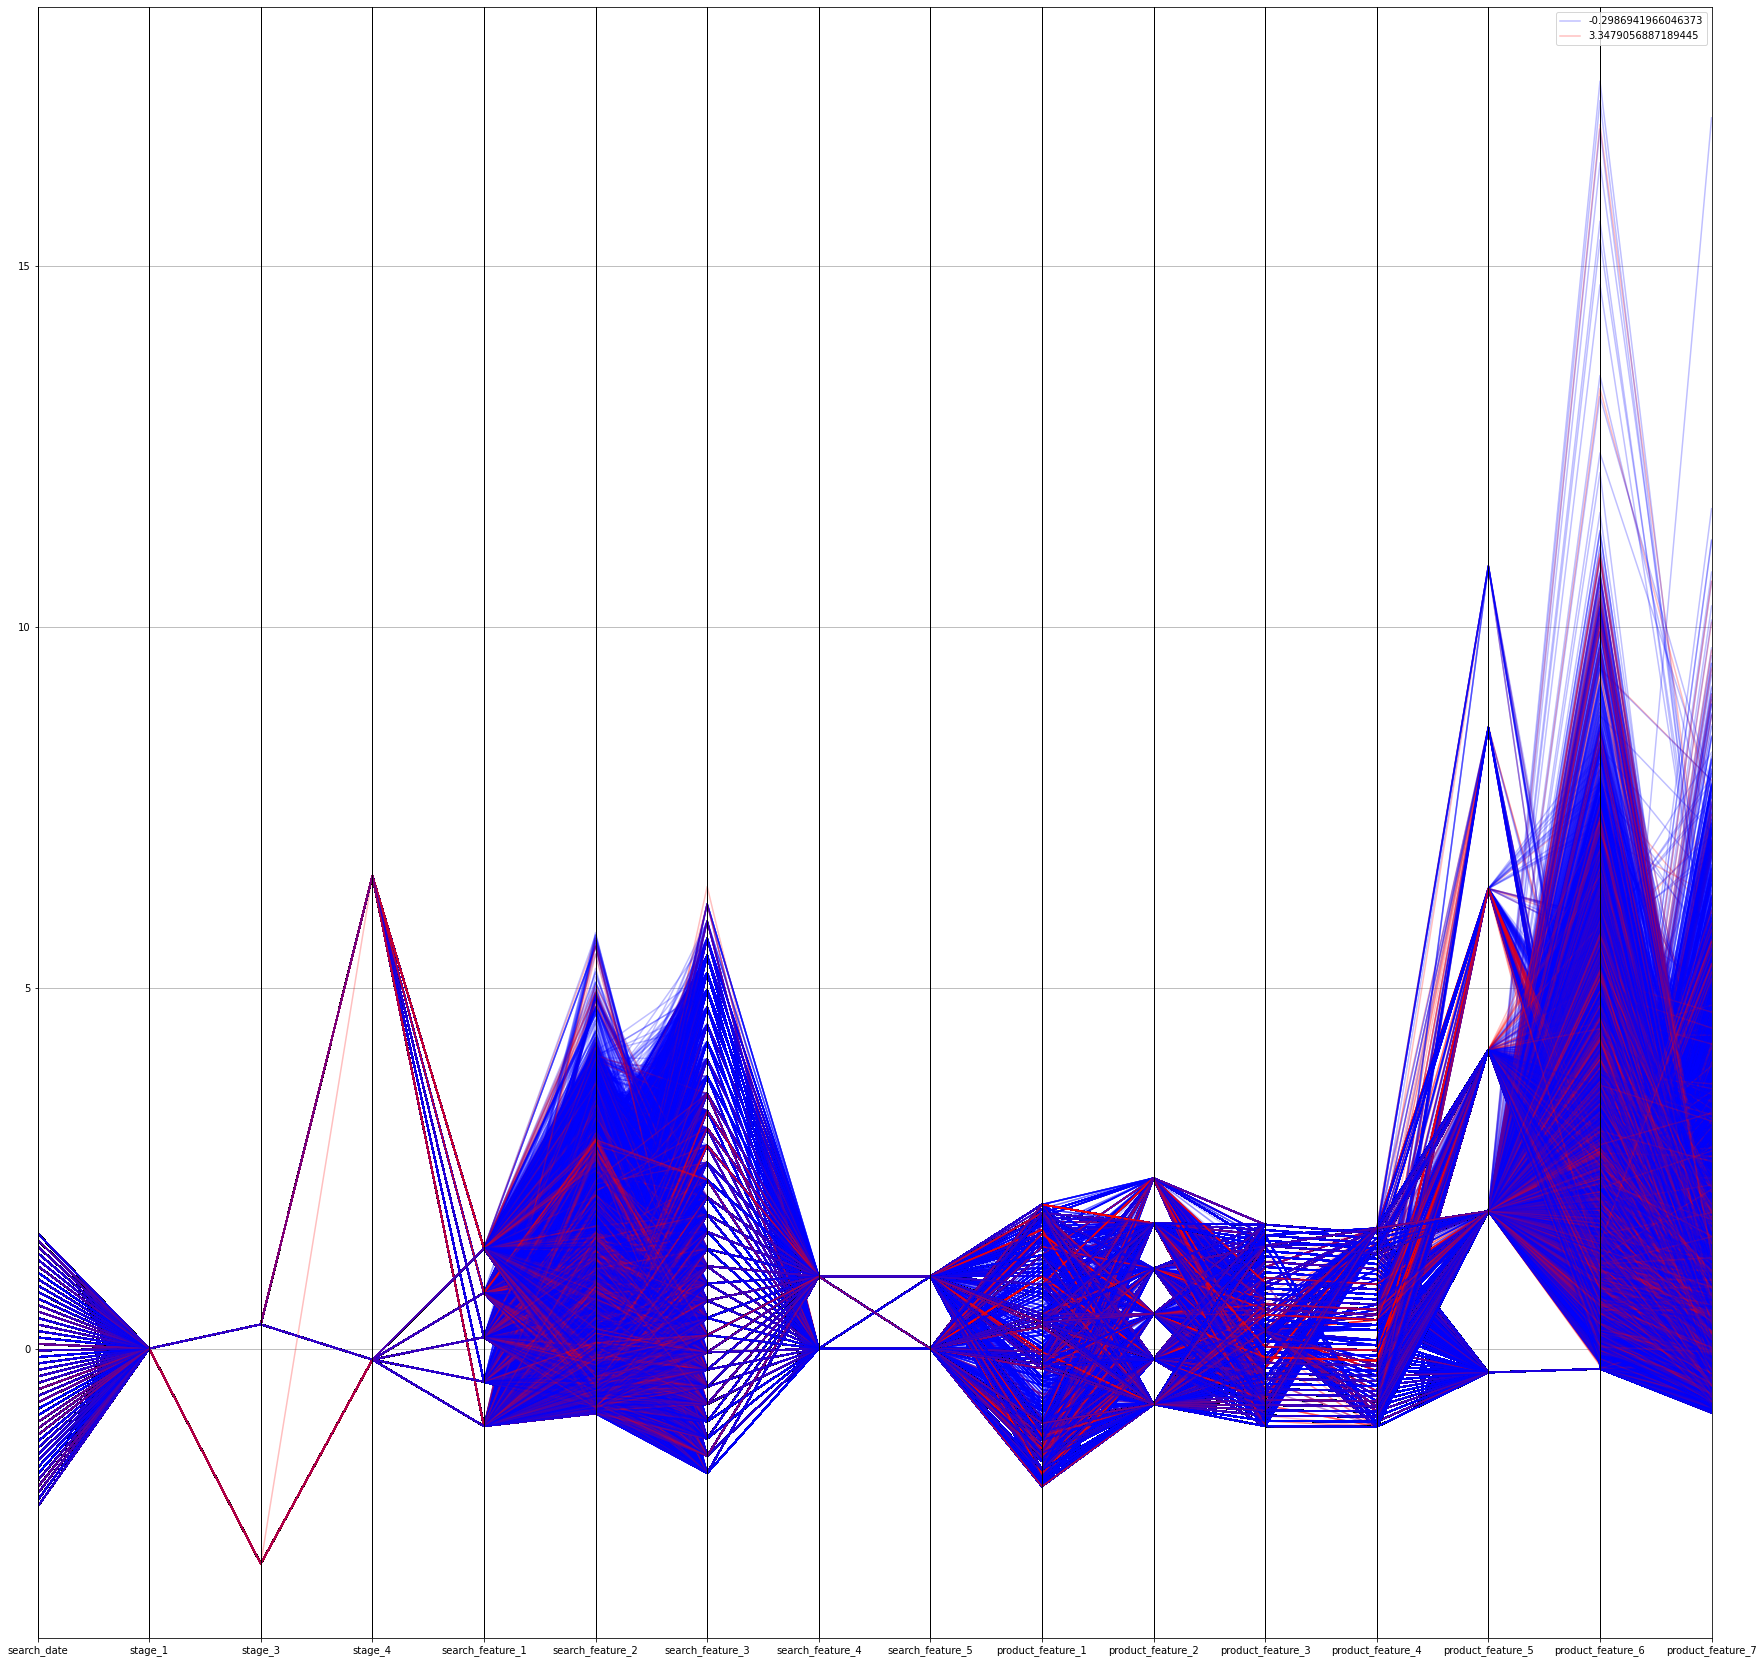

In [66]:

clusterer = KMeans(n_clusters = 2, random_state = 1,n_jobs = -1)
y = clusterer.fit_predict(df2)
text = "For clusters = {} The average silhoutte_score is:{}"
print(text.format(2,round(silhouette_score(df2,y, n_jobs = -1),2)))
df2['cluster'] = y
#pd.plotting.parallel_coordinates(df2,'cluster', color=['b','r'])
pd.plotting.parallel_coordinates(df2[['search_date','stage_1','stage_2','stage_3','stage_4','search_feature_1','search_feature_2','search_feature_3','search_feature_4','search_feature_5','product_feature_1','product_feature_2','product_feature_3','product_feature_4','product_feature_5','product_feature_6','product_feature_7']],'stage_2',color=['b','r'],alpha = 0.25)


    
#df2_array = df2.to_numpy()

In [71]:
df2.where(df2['cluster'] == 1).count()

search_date          31947
stage_1              31947
stage_2              31947
stage_3              31947
stage_4              31947
search_feature_1     31947
search_feature_2     31947
search_feature_3     31947
product_feature_1    31947
product_feature_2    31947
product_feature_3    31947
product_feature_4    31947
product_feature_5    31947
product_feature_6    31947
product_feature_7    31947
search_feature_4     31947
search_feature_5     31947
cluster              31947
dtype: int64

hi
